In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/AMZN (1).csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-24,163.749496,164.118500,160.050003,163.649506,163.649506,56798000
1,2022-03-25,164.000000,165.368500,162.250000,164.773499,164.773499,49032000
2,2022-03-28,164.975006,169.037506,164.899994,168.990494,168.990494,59854000
3,2022-03-29,170.384003,170.831497,167.868500,169.315002,169.315002,66154000
4,2022-03-30,168.509506,168.950500,165.500000,166.300995,166.300995,56168000
...,...,...,...,...,...,...,...
246,2023-03-17,99.790001,100.660004,97.459999,98.949997,98.949997,87173200
247,2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900
248,2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300
249,2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400


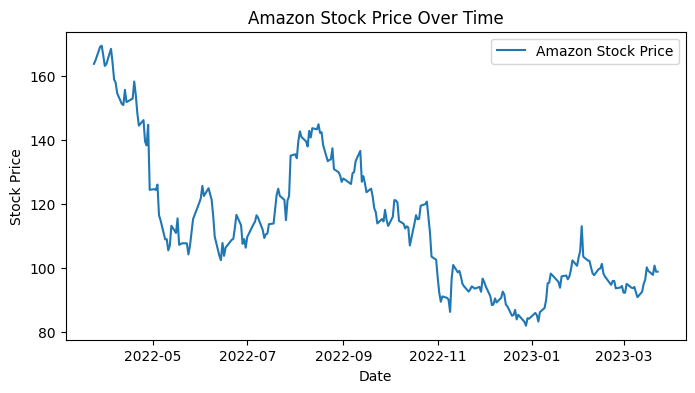

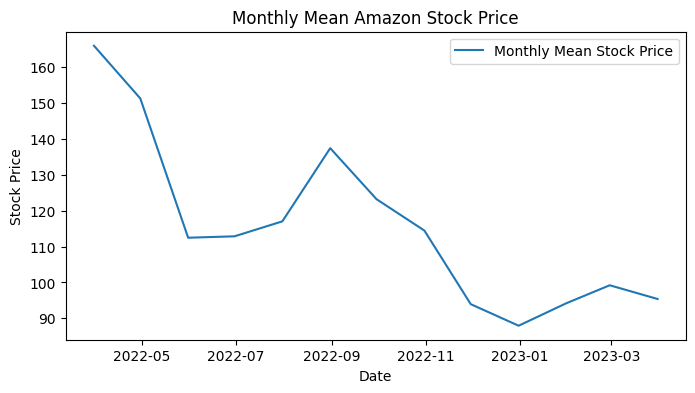

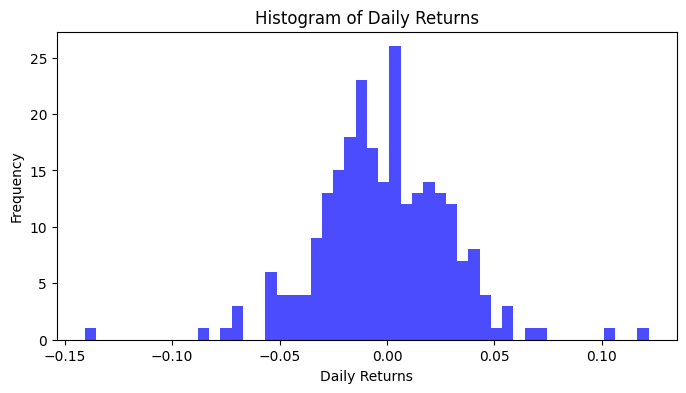

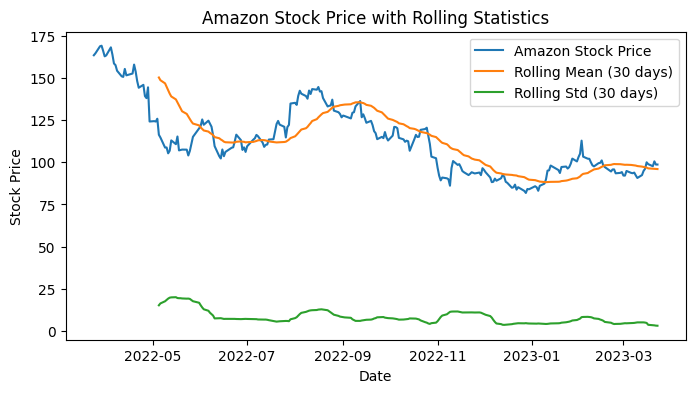

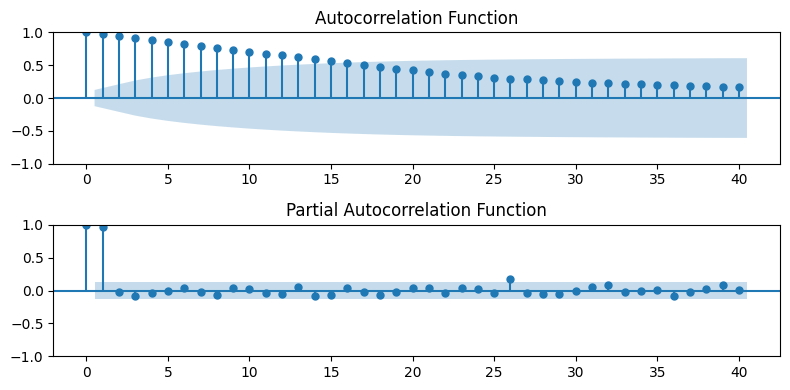

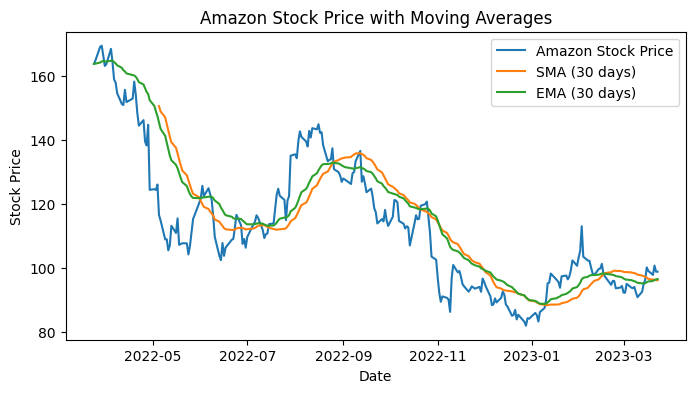

ADF Statistic: -2.362886621361359
p-value: 0.15248646285791673
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import calendar


# Load CSV data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/AMZN (1).csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Forward fill missing values
data.fillna(method='ffill', inplace=True)

# Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(data['Close'], label='Amazon Stock Price')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Resample to monthly frequency and calculate the mean price for each month
monthly_data = data['Close'].resample('M').mean()

plt.figure(figsize=(8, 4))
plt.plot(monthly_data, label='Monthly Mean Stock Price')
plt.title('Monthly Mean Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#Histogram of daily returns
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()
plt.figure(figsize=(8, 4))
plt.hist(data['Daily_Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


#Rolling Statistics
# Calculate rolling mean and standard deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()
plt.figure(figsize=(8, 4))
plt.plot(data['Close'], label='Amazon Stock Price')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.plot(rolling_std, label='Rolling Std (30 days)')
plt.title('Amazon Stock Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plot_acf(data['Close'], lags=40, ax=plt.gca(), title='Autocorrelation Function')
plt.subplot(2, 1, 2)
plot_pacf(data['Close'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

#Simple Moving Average (SMA) and Exponential Moving Average (EMA)
# Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
sma = data['Close'].rolling(window=30).mean()
ema = data['Close'].ewm(span=30, adjust=False).mean()
plt.figure(figsize=(8, 4))
plt.plot(data['Close'], label='Amazon Stock Price')
plt.plot(sma, label='SMA (30 days)')
plt.plot(ema, label='EMA (30 days)')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#Candlestick chart
import plotly.graph_objects as go
# Forward fill missing values
data.fillna(method='ffill', inplace=True)
# Create a DataFrame for candlestick chart
candle_data = data[['Open', 'High', 'Low', 'Close']]
# Create a candlestick chart using plotly
fig = go.Figure(data=[go.Candlestick(x=candle_data.index,
                open=candle_data['Open'],
                high=candle_data['High'],
                low=candle_data['Low'],
                close=candle_data['Close'])])
fig.update_layout(title='Amazon Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()




# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
